<a href="https://colab.research.google.com/github/CharlyPierce/Regression/blob/main/IA_best_paxis_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=10000,        initial_learning_rate * decay_rate ^ (step / decay_steps)
#     decay_rate=0.9)
# optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

def buil_model():
  ler=tf.keras.optimizers.schedules.ExponentialDecay(0.3,decay_steps=50,decay_rate=0.08,)
  model=tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1,input_shape=(1,)))
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=ler),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model
def trainin_model(model,features,labels,batch_size,epoch):
  history=model.fit(features,labels,batch_size=batch_size,epochs=epoch,validation_split=0.2)
  tw=model.get_weights()[0]
  tb=model.get_weights()[1]
  return history,tw,tb

In [ ]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])
#Para validation_split debes volverlos arrays#puedes convertirlos a dataframe pd.DataFrame({'a':my_feature,'b':my_label},)
my_feature=np.array(my_feature)
my_label=np.array(my_label)

In [ ]:
m_model=buil_model()
history,tw,tb=trainin_model(m_model,my_feature,my_label,batch_size=3,epoch=4)

1
Epoch 1/4
3/3 [==============================] - 0s 76ms/step - loss: 83.0375 - root_mean_squared_error: 9.1125 - val_loss: 32.7345 - val_root_mean_squared_error: 5.7214
Epoch 2/4
3/3 [==============================] - 0s 11ms/step - loss: 7.8640 - root_mean_squared_error: 2.8043 - val_loss: 3.1245 - val_root_mean_squared_error: 1.7676
Epoch 3/4
3/3 [==============================] - 0s 12ms/step - loss: 1.7216 - root_mean_squared_error: 1.3121 - val_loss: 0.4539 - val_root_mean_squared_error: 0.6737
Epoch 4/4
3/3 [==============================] - 0s 11ms/step - loss: 1.2006 - root_mean_squared_error: 1.0957 - val_loss: 0.3900 - val_root_mean_squared_error: 0.6245
2
3
4


In [ ]:
pd.DataFrame(history.history)

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,83.037514,9.112493,32.734459,5.721404
1,7.864002,2.804283,3.124455,1.767613
2,1.721571,1.312087,0.453939,0.673750
3,1.200574,1.095707,0.390047,0.624538


In [ ]:
a=pd.DataFrame(history.history)#loss and metrics
epochs=history.epoch#a.columns[1]='mean_squared_logarithmic_error'
MSE=a[a.columns[1]]#tw,tb #trainin weights training weights bias

In [ ]:
a[a.columns[1]]

0    9.112493
1    2.804283
2    1.312087
3    1.095707
Name: root_mean_squared_error, dtype: float64

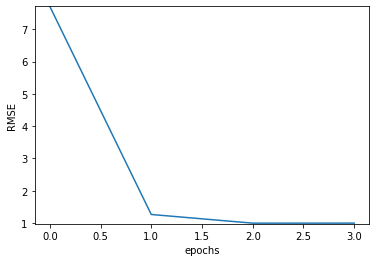

In [ ]:
def plot_loss(MSE,epochs):
  plt.xlabel('epochs')
  plt.ylabel('RMSE')
  plt.plot(epochs,MSE)
  plt.ylim(MSE.min()*0.98,MSE.max())
  plt.show()
plot_loss(MSE,epochs)

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


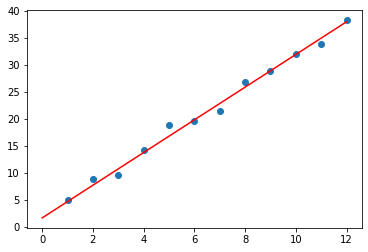

In [ ]:
plt.scatter(my_feature,my_label)
x0=0
x1=my_feature[-1]
y0=tb
y1=(tw*x1)+tb
plt.plot([x0,x1],[y0,y1],c='r')